<a href="https://colab.research.google.com/github/Adrianopogianeli/deep_learning_with_pyhon_sencond_edition/blob/master/EDA_Cardio_Good_Fitness_Project_Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>EDA - Exploratory Data Analysis </center></h1>



<h1><center>Cardio Good Fitness Project </center></h1>


### **Objective:**
Explore the dataset to identify differences between the customers of each product.

Explore relationships between the different attributes of the customers. 

You can approach it from any other line of questioning that 

you feel could be relevant for the business. 

You are expected to do the following  :

1. Come up with a customer profile (characteristics of a customer) of the different products.

2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.


### **Data Description:**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

#Importing the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

#Loading the dataset

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/University of Texas/Fundamentals of AIML/project/CardioGoodFitness.csv')
# Making a copy to another variable to avoid any changes to original data
df = data.copy()

#1 - Understanding the structure of the data

In [4]:
#Get a view of the first and the last 5 rows of the dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


* It would be a good aproach to check the unique values in the columns: Prodcut, Gender and MaritalStaus.

##Understand the shape of the dataset

In [6]:
# Get the dimension of the dataset
df.shape

(180, 9)

* The dataset has 180 rows and 9 columns

## Check Data types and missing values

In [7]:
# Checking the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
# checking missing values across each columns
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* All the 9 columns have 180 observations, there are no missing values in them.

* The Product, Gender and MaritalStatus columns are of object type while the rest of the columns are numerical in nature.

* The categories columns are: Product, Gender and MaritalStatus

##Check the statistical summary of the data.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


* `Age:` On average they are 28 years old. 75% of the persons are less than or equal to 33 years old. There are some persons which are 50 years old.
* `Education`: On average they have 16 years of education and some have 21 years. some of them may have higher education level.
* `Usage`: 75% of the customers wants to use the treadmill at least 4 times per week, it very closy to the average: 3.45.
The distribution between Usage and Fitnees looks like fine.
* `Income`: On average the income has around 53719. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column. 
* `Miles`: On average the miles has around 103. The column has a large standard deviation of 51.83 miles.
There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.


## Checking for duplicate entries in the data

In [10]:
df.duplicated().sum()

0

* None duplicate entries found in the data.

##Check the uniques values on categories columns

In [11]:
# let's check the total number of unique values in the Product column
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [12]:
df['Product'].nunique()

3

In [13]:
# let's check the total number of unique values in the Gender column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df['Gender'].nunique()

2

In [15]:
# let's check the total number of unique values in the MaritalStatus column
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [16]:
df['MaritalStatus'].nunique()

2

In [17]:
# Create a list with the categorical columns:
cat_cols = ['Product','Gender','MaritalStatus']
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print("-" * 50,(column),':')
    print(data[column].value_counts(normalize=True, dropna=False)*100)

-------------------------------------------------- Product :
TM195    44.444444
TM498    33.333333
TM798    22.222222
Name: Product, dtype: float64
-------------------------------------------------- Gender :
Male      57.777778
Female    42.222222
Name: Gender, dtype: float64
-------------------------------------------------- MaritalStatus :
Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64


Observations:
* The total number of different products sold by the company are 3: 'TM195', 'TM498', 'TM798'. The best selling product is the TM195 representing 44% of the total items sold, in second position is the TM498 representing 33%.

* There are only 2 kind of customer's genders in the dataset:  'Male', 'Female'. The Male gender represents 57.7% of the total customers.

* There are only 2 kind of customer's MaritalStatus in the dataset: 'Single', 'Partnered'. The Partnered MaritalStatus represents 59% of the total customers.



# 2 - Univariate Analysis

## Checking the distribution for numerical columns:

In [18]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

###Observations on Age

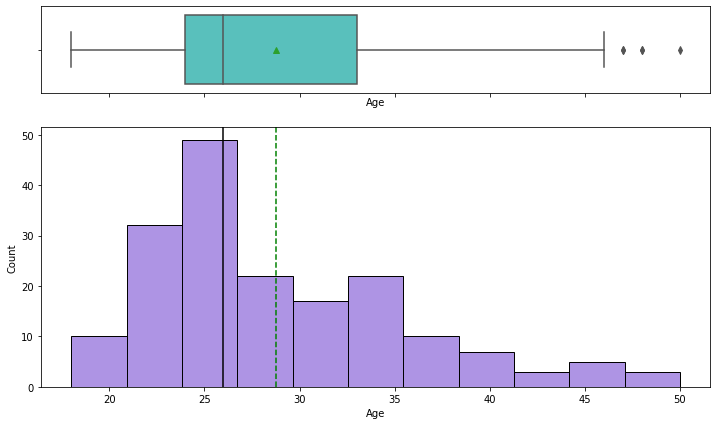

In [19]:
histogram_boxplot(df,'Age')

* The distribution is skewed towards right.
* There are outliers present in this column. 
* Values above 45 years are being represented as outliers in the boxplot, indicate there are some customers that are at least more than 45 years old.

###Observations on Education

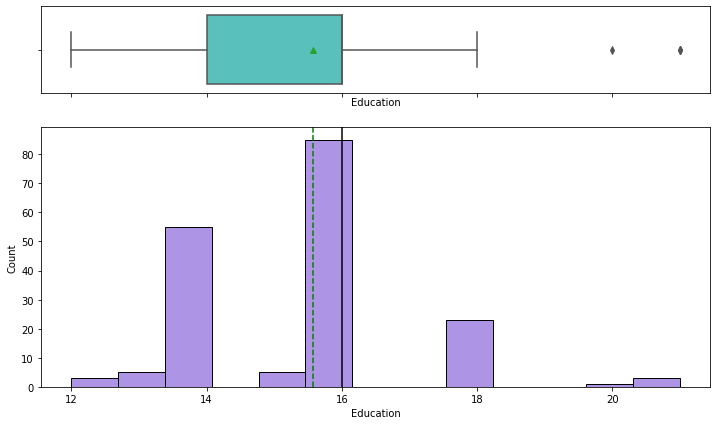

In [20]:
histogram_boxplot(df,'Education')

* The distribution is skewed towards right.
* Customers with more than 18 years of education are being represented as outliers by the boxplot.
* Let's find out how many such customers are there which have more than 18 years of education and what are the gender of such customers.

In [21]:
# selecting customers which have more than 18 years of education 
df.loc[df['Education']>18]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,TM798,25,Male,20,Partnered,4,5,74701,170
157,TM798,26,Female,21,Single,4,3,69721,100
161,TM798,27,Male,21,Partnered,4,4,90886,100
175,TM798,40,Male,21,Single,6,5,83416,200


In [22]:
# create a new column with the difference between Age and Education
df['diff_age_Education'] = df['Age']-df['Education']

In [23]:
df.loc[df['Education']>18]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,diff_age_Education
156,TM798,25,Male,20,Partnered,4,5,74701,170,5
157,TM798,26,Female,21,Single,4,3,69721,100,5
161,TM798,27,Male,21,Partnered,4,4,90886,100,6
175,TM798,40,Male,21,Single,6,5,83416,200,19


Observation:
* In the United States, public school usually starts between age 4 and 6 and continues until around age 17 to 18. The 3 first customers can match 20/21 Education years  because the difference of their age with their Education are above 4 years. It means they stuying since they were 5 years old.
* The outliers in Age are a valid data entry


In [24]:
# Drop the column diff_age_Education in order it is necessary anymore
del df['diff_age_Education']

### Observations on Usage

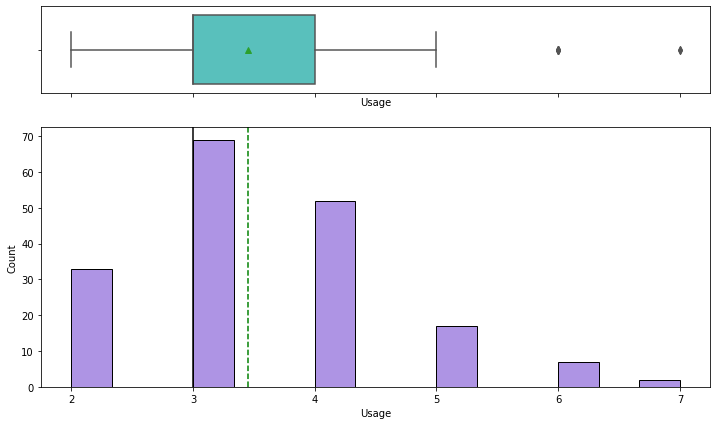

In [25]:
histogram_boxplot(df,'Usage')


* The distribution is similar to that of Education. It suggests possible correlation between the two variables
* There are outliers towards the right, indicating that some customers Usage are above 5 per week


### Observations on Fitness


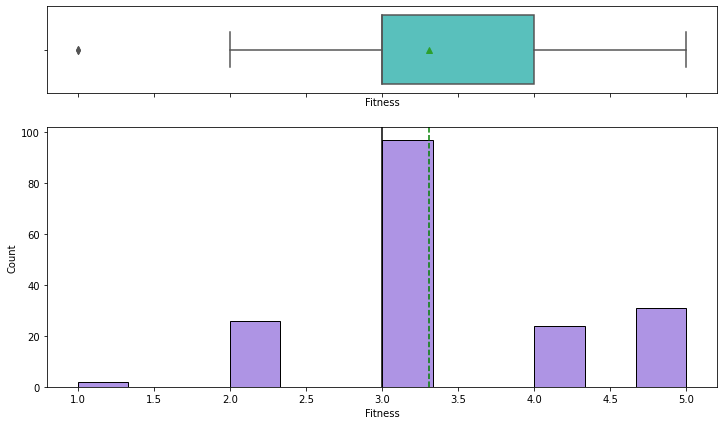

In [26]:
histogram_boxplot(df,'Fitness')

* The distribution is skewed towards left.
* Both the mean and median, indicating that the Self rated fitness score of the customer are good
* There are, however, outliers towards the left, indicating that fitness score is extremely low on some customers


### Observations on Income


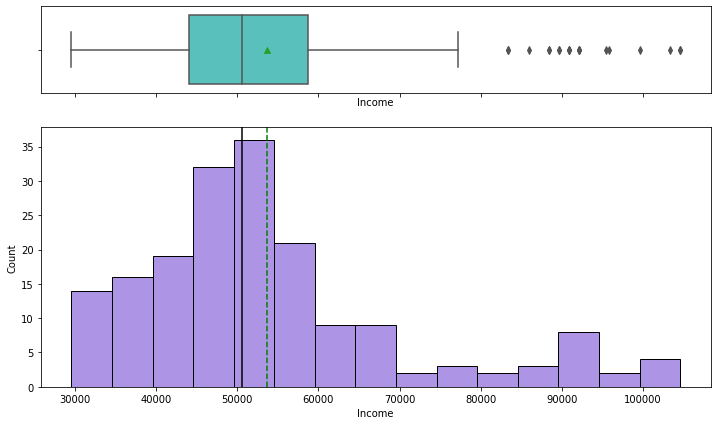

In [27]:
histogram_boxplot(df,'Income')

* The distribution is skewed towards right.
* There are, however, outliers towards the right, indicating that some customers income are extremely high in comparison with the mean

### Observations on Miles

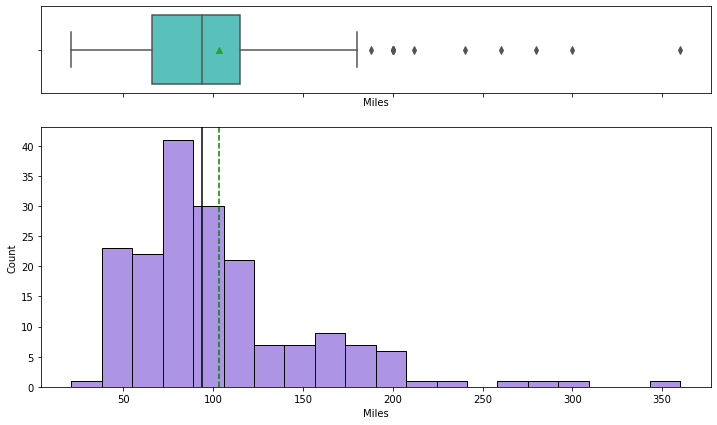

In [28]:
histogram_boxplot(df,'Miles')

* The distribution is skewed towards right.
* There are, however, outliers towards the right, indicating that some customer's miles are extremely high in comparison with the mean, some of them could be an athletes



### Observations on Gender

In [29]:
# Creating a function to generate pie chart for the categorical columns
import matplotlib.colors as mcolors
def create_pie_chart(pie_dataframe,column_name,num_cat=2):
  # Defining colors for the pie chart
  if num_cat <=2:
    colors = ['orange','steelblue']
  else:
    colors = ['steelblue','orange','g','r','c','m','y','k','w'] 
  # Define the ratio of gap of each fragment in a tuple
  explode = [(lambda x: x)(0.05) for x in range(num_cat)]  
  # Plotting the pie chart for Column 
  pie_dataframe.groupby([column_name])[column_name].count().plot(
      kind='pie', y=column_name,autopct='%1.0f%%',
    colors=colors, explode=explode,figsize=(12, 7));

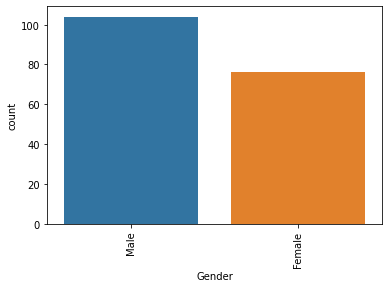

In [30]:
# Creating a countplot chart for the categorical column countplot
sns.countplot(data=df,x='Gender')
plt.xticks(rotation=90)
plt.show()

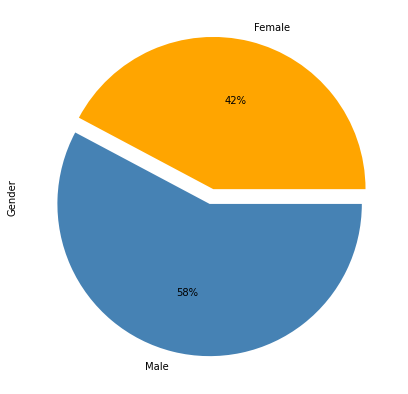

In [31]:
# Creating a pie chart for the categorical column countplot
create_pie_chart(df,'Gender')

* The majority number of customers are Male which represents 58% of the total customers

### Observations on MaritalStatus

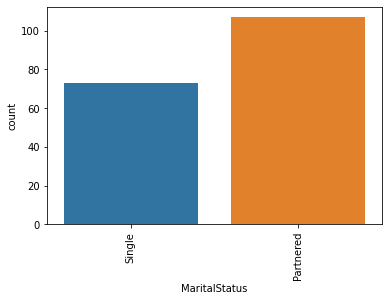

In [32]:
# Creating a countplot chart for the categorical column MaritalStatus
sns.countplot(data=df,x='MaritalStatus')
plt.xticks(rotation=90)
plt.show()

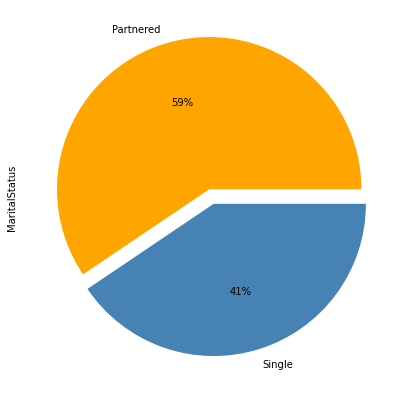

In [33]:
create_pie_chart(df,'MaritalStatus')

* There is more Customers with Partners than Single customers
* The Customers with Partners represent 59% of the total customer

### Observations on Product

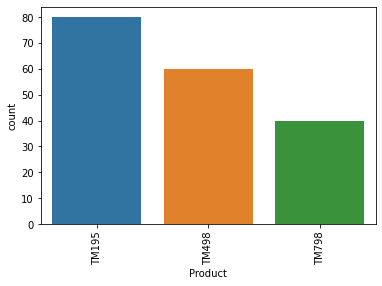

In [34]:
# Creating a countplot chart for the categorical column MaritalStatus
sns.countplot(data=df,x='Product')
plt.xticks(rotation=90)
plt.show()

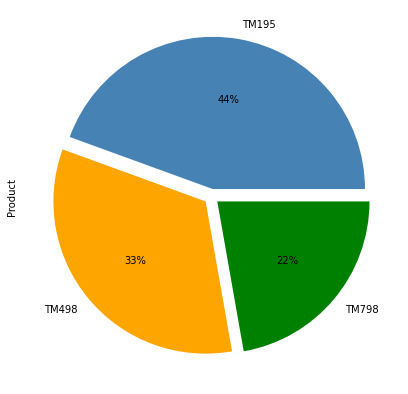

In [35]:
create_pie_chart(df,'Product',3)

* The Product which is more sold is the TM195, which is 2x times the number of sold product TM798 which represents 22% of total items sold.

# 3 - Bivariate Analysis

## Correlation by Heatmap

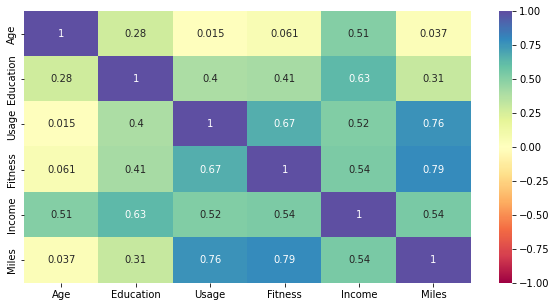

In [36]:
# plot the heatmap based in the values of the function df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations**

* **Age** has a positive correlation with **Income**, it indicates that more older the customer is more the number of Income.
* **Education** column show a high correlation with **Income** which is expected.
* **Usage** has a high positive correlation with the columns: **Milles**, **Fitness** and **Income**, it appears that customers tend to get more Usage based on higher number of Miles, Fitness and Income
* **Fitness** and **Miles** shows a high correlation which makes sense as if the Fitness number is more the Miles area will also be more.
* **Income** column also has a positive correlation with all other columns, it indicates that more Income the customer has more **Educated** and **Fitness** it tends to be.
* **Miles** has a low positive correlation with **Age**, it indicates that more older the customer is the number of Miles will decrease, which is expected.


## Bivariate Scatter Plots

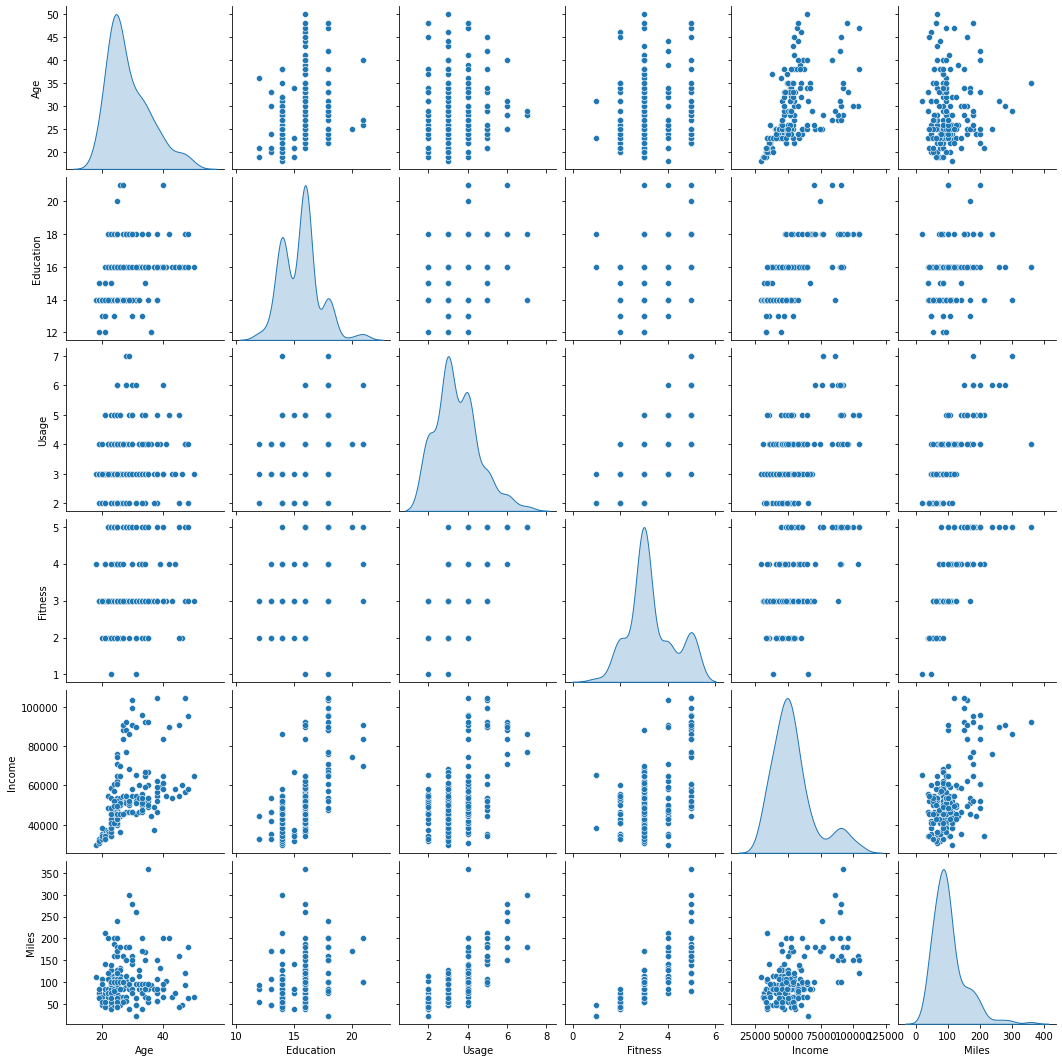

In [37]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

* We get the same insights as from the correlation plot
* There does seem to be a strong relationship between Income and the fitness stats

## Checking the trend between Product across customer profile

### Product vs Age

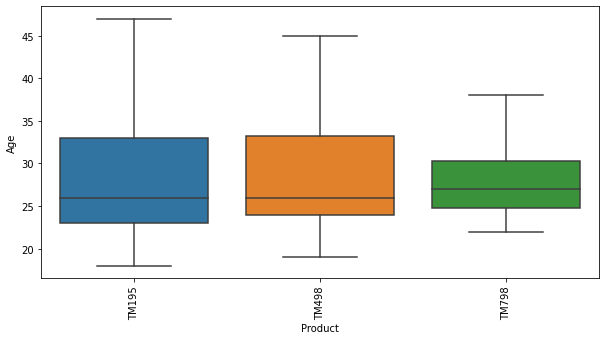

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Age',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

* Customers which are between **25 and 30 years old** tend to prefer the **Product TM798**
* Customers older than **30** tend to prefer the **Products TM195 and TM498**

### Product vs Education

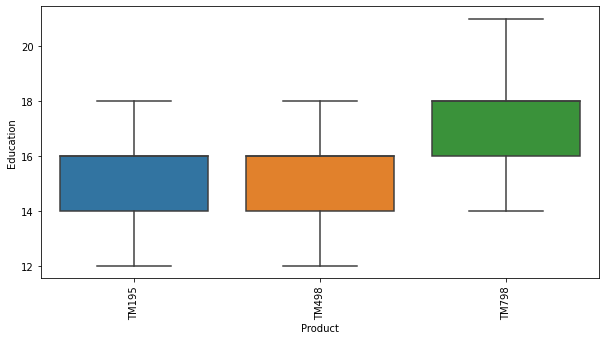

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Education',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

* The **Product** **TM798**  is the favorite for customers which have the **Education** higher than **16**
* Customers which the **Education** is less than 16 tends to prefer the Products TM195 and TM498


### Product vs Income

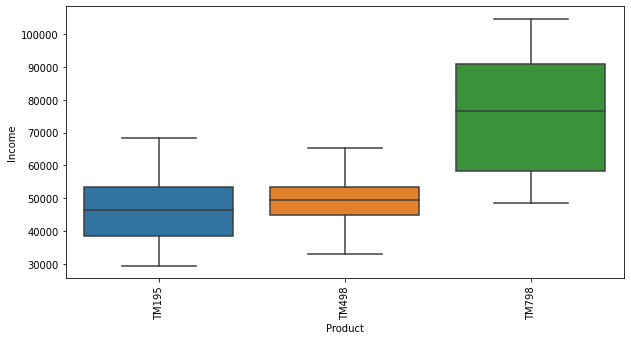

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Income',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

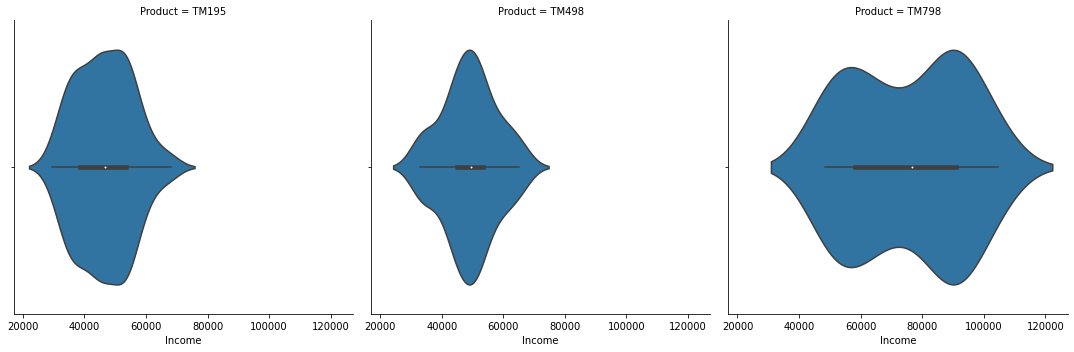

In [95]:
# Dispersion of Income in Product
sns.catplot(x='Income', col='Product', data=df, col_wrap=4, kind="violin")
plt.show()


* Customers with **higher** **Income** (more than **60000**) tend to prefer the Product **TM798**
* Customers which have Income between **40000** and **55000** tend to prefer the Product **TM195** 

### Product vs Fitness

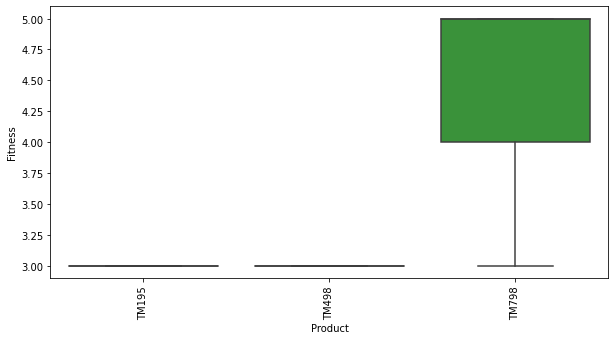

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Fitness',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()


* The product **TM798** is the favorite for customer which the Fitness is more than 3 
* It is possible that the **TM798** product will be used by athletic customers

### Product vs Miles

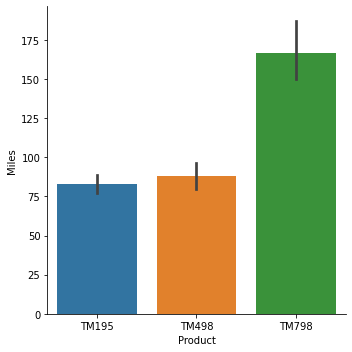

In [119]:
sns.catplot(x='Product', y='Miles', data=df, kind="bar")
plt.show()

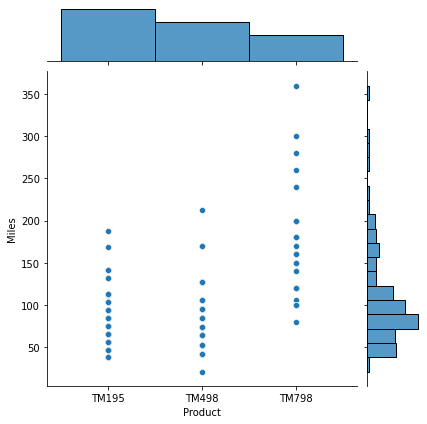

In [117]:
# lets displays the relationship between the two variables and the distribution of each variable in the margins
sns.jointplot(data=df, x='Product', y='Miles');

* The Product **TM798** is indicate for customers which expect run more than **100** **Miles**
* The Product **TM195** and **TM498** are indicate for customers which expect run less than **100** **Miles**
* The Product **TM498** is indicated for customers who want to start using the treadmill for a few miles.

### Product vs Usage

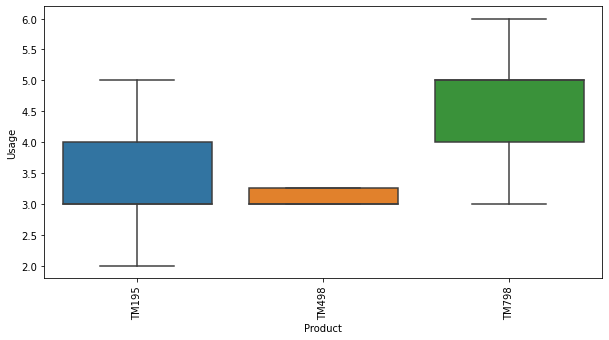

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Product',y='Usage',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

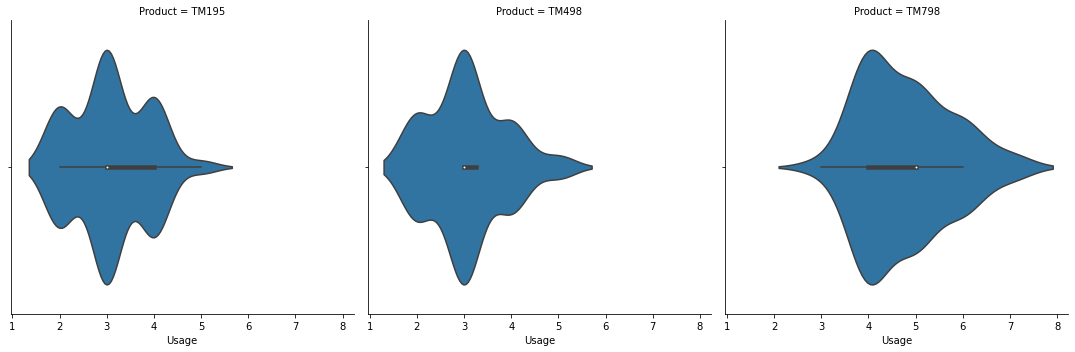

In [48]:
# Dispersion of pickups in every borough
sns.catplot(x='Usage', col='Product', data=df, col_wrap=4, kind="violin")
plt.show()

* The **TM798** product is the most used and then we have the **TM195** and **TM498** in the respective order

# 4 - Multivariate Data Analysis

<Figure size 1440x1440 with 0 Axes>

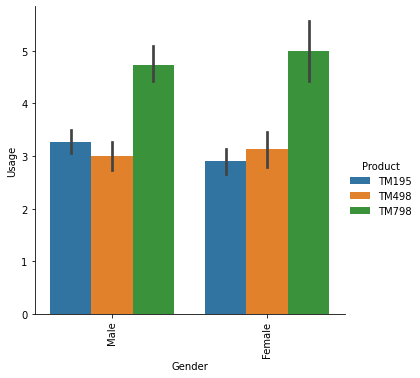

In [124]:
plt.figure(figsize=(20,20))
sns.catplot(x='Gender', y='Usage', data=df, kind="bar", hue='Product')
plt.xticks(rotation=90)
plt.show()

* **Both** **Genders** Male and Female in general prefer the Product **TM798** when their Usage are higher than **3.5** per week.
* When their Usage are under 3.5 the **Male** Gender prefer the Product **TM195** than **TM498** , while the **Female** Gender prefer the Product **TM498** than **TM195**


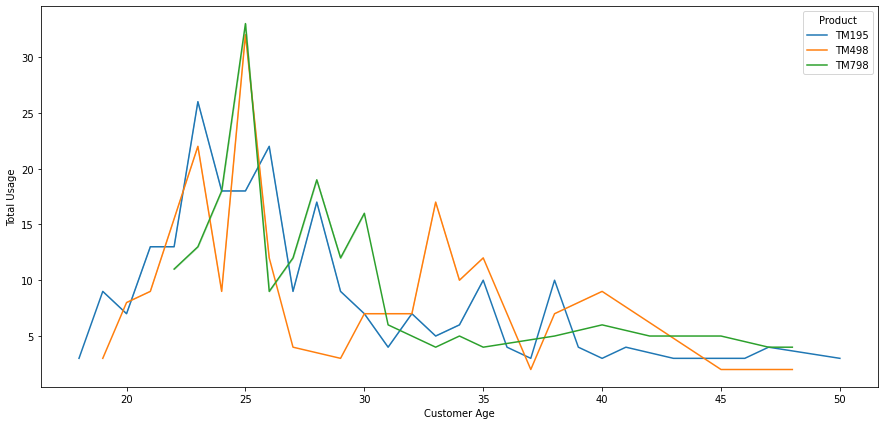

In [145]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="Age", y="Usage", hue='Product', estimator='sum', ci=False)
plt.ylabel('Total Usage')
plt.xlabel('Customer Age')
plt.show()

Checking why the customers who are under 25 years older tend to prefer the products: TM195 and TM498 over TMP798

In [152]:
# creating a new dataset filtering who are under 25 years older
age_under_25 = df.loc[df['Age']<25]
# let group by it by Product and the mean of the customer's Income
age_under_25.groupby(['Product'])['Income'].mean()

Product
TM195    37184.111111
TM498    39661.235294
TM798    53297.200000
Name: Income, dtype: float64

In [153]:
# let group by it by Product and the mean of the customer's Fitness
age_under_25.groupby(['Product'])['Fitness'].mean()

Product
TM195    2.925926
TM498    2.823529
TM798    4.700000
Name: Fitness, dtype: float64

It seems only customers with higher Income and Fitness status buy the product TMP798 before completing 25 years older 

Observation:
* The number of Usage is very higher between the 20 and 26 years old when we see the spread across customer Age*
* The Product's Usage tends to decrease after the Age 30.
* Customers who are under 25 years older tend to prefer the products: TM195 and TM498 over TMP798 which is professional equipment more expensive
* The Product TMP798 has higher Usage for customers which are between 25 and 30 years old, while the Product TM498 is for customers between 30 and 40 years old


# 5 - Outlier Detection and Treatment

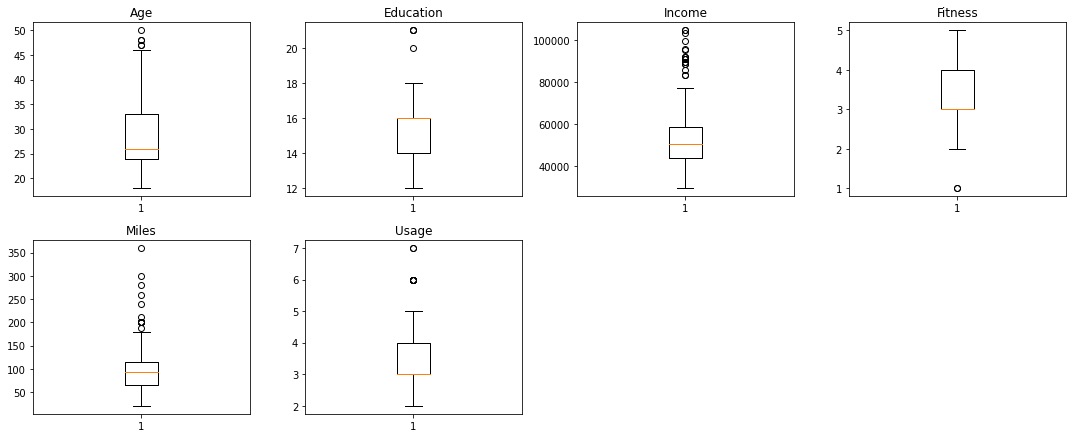

In [146]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['Age','Education','Income','Fitness','Miles', 'Usage']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- *The `Income` column has a wide range of values with lots of outliers. However we are not going to treat this column since the number of Income can have a varying range and we can miss out on some genuine values if we treat this column*

- *Age, Education, Miles and Usage, however all of them seem to be genuine values. So we are not going to treat the outliers present in these columns*

#6 - Actionable Insights and Recommendations

## Insights

We analyzed a dataset of nearly 180 customer's information
about the treadmill product(s) of a retail store called Cardio Good Fitness.

The data spanned over the Products: TM195, TM498, and TM798 sold by the store and without dates information.

The main feature of interest here is come up with a customer profile in relation to different products sold by the store and determined the factors that affect the selling of each product per each customer profile.

We have been able to conclude that -  

1. The Top selling product by quantity is the TM195 representing 44% of the total items sold, in the second position is the TM498 representing 33%, and TM798 in the third position with 22%.
2. Customers which are between 25 and 30 years old tend to prefer the Product TM798 as well as the customer who has a fitness status higher than 3.
3. The Education level also has an influence on customer decisions, products TM195 and TM498 tend to be chosen by customers with less education. 
4. Even though we don't have the data with the values of the products, it is possible to estimate what product has more value than another by using the customer's profile.
5. It seems the best option for customers who want to start a workout with the treadmill is the TM498 since it is the choice of customers who plans to use it with fewer miles.
6. In general, the male customer who plans to use the treadmill every 3 times a week tends to buy the TM195, while the female customer prefers the TM498.
7. Customers tend to choose different products depending on their age and fitness goals 

#### **Recommendations to business**

1. The Top selling product by quantity is the TM195, but the favorite product choose by Usage is the **TM798**.
2. The product **TM798** has a higher match for customers between 25 and 30 years old and also for customers with a higher fitness status.
3. The Education level also has an influence on customer decisions, we can see some patterns related to the products (TM195 and TM498) which have less professional usage being chosen by customers with medium education.
4. Based on the customer's income profile, the TM798 product has more value than the other, customers with higher income tend to purchase it.
5. The best option for customers who want to start training with the treadmill is the TM498, it would be worthwhile to create a special marketing ad for this product aimed at new customers.
6. A special marketing ad aimed at male customers can be created for the TM195 product, while TM498 is more suitable for female customers.
7. Customers tend to choose different products depending on their age and fitness goals, would be a good opportunity for the company to create a service plan in order for the customer can change their products as far as their goals and age evolve.


In [ ]:
#print the report as html
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb